In [2]:
# Load data
import pickle

num_leapfrog_steps = 10000
file = 'BAPINN_leapfrog_' + str(num_leapfrog_steps) + '.pkl'

with open('../../Results/A vs N - 1000+/' + file, 'rb') as f:
    samples = pickle.load(f)
    momentum_norm_total = pickle.load(f)
    alphas = pickle.load(f)
    proposed_H_store = pickle.load(f)
    current_H = pickle.load(f)
    grad_list_total = pickle.load(f)
    negative_log_posterior_list_total = pickle.load(f)
    acceptance_list = pickle.load(f)
    MAP_weights = pickle.load(f)
    MAP_biases = pickle.load(f)
    momentum_keep = pickle.load(f)
    potential_keep = pickle.load(f)

import numpy as np
import matplotlib.pyplot as plt

# From the file name, we know that the model is trained with 100 leapfrog steps so set n_steps using the file name
num_samples = len(acceptance_list)

# Find number of accepted samples
num_accepted = np.sum(acceptance_list)
num_rejected = num_samples - num_accepted
print('No of Accepted: ', num_accepted)
print('No of Rejected: ', num_rejected)
print(acceptance_list)

# find the index of the first accepted sample
#first_accepted = 0
for i in range(num_samples):
    if acceptance_list[i] == 1:
        first_accepted = i
        break
for i in range(num_samples):
    if acceptance_list[i] == 0:
        first_rejected = i
        break
print('First accepted sample: ', first_accepted, 'First rejected sample: ', first_rejected)

No of Accepted:  26
No of Rejected:  74
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
First accepted sample:  1 First rejected sample:  0


In [19]:
# find the outliers in the momentum norm
outliers = []
for j in range(num_samples):
    for i in range(num_leapfrog_steps):
        if momentum_norm_total[j][i][1] > 50:
            outliers.append((j, i))
print('Outliers: ', outliers)

outliers = []
for j in range(num_samples):
    for i in range(num_leapfrog_steps):
        if grad_list_total[j][i][1] > 10000:
            outliers.append((j, i))
print('Outliers: ', outliers)

outliers = []
for j in range(num_samples):
    for i in range(num_leapfrog_steps):
        if negative_log_posterior_list_total[j][i] > 50000:
            outliers.append((j, i))
print('Outliers: ', outliers)

Outliers:  [(30, 965), (30, 966), (30, 967), (30, 968), (30, 969), (30, 970), (30, 971), (30, 972), (30, 973), (30, 974), (30, 975), (30, 976), (30, 977), (30, 978), (30, 979), (30, 980), (30, 981), (30, 982), (30, 983), (30, 984), (30, 985), (30, 986), (30, 987), (30, 988), (30, 989), (30, 990), (30, 991), (30, 992), (30, 993), (30, 994), (30, 995), (30, 996), (30, 997), (30, 998), (30, 999), (81, 818), (81, 819), (81, 820), (81, 821), (81, 822), (81, 823), (81, 824), (81, 825), (81, 826), (81, 827), (81, 828), (81, 829), (81, 830), (81, 831), (81, 832), (81, 833), (81, 834), (81, 835), (81, 836), (81, 837), (81, 838), (81, 839), (81, 840), (81, 841), (81, 842), (81, 843), (81, 844), (81, 845), (81, 846), (81, 847), (81, 848), (81, 849), (81, 850), (81, 851), (81, 852), (81, 853), (81, 854), (81, 855), (81, 856), (81, 857), (81, 858), (81, 859), (81, 860), (81, 861), (81, 862), (81, 863), (81, 864), (81, 865), (81, 866), (81, 867), (81, 868), (81, 869), (81, 870), (81, 871), (81, 872)

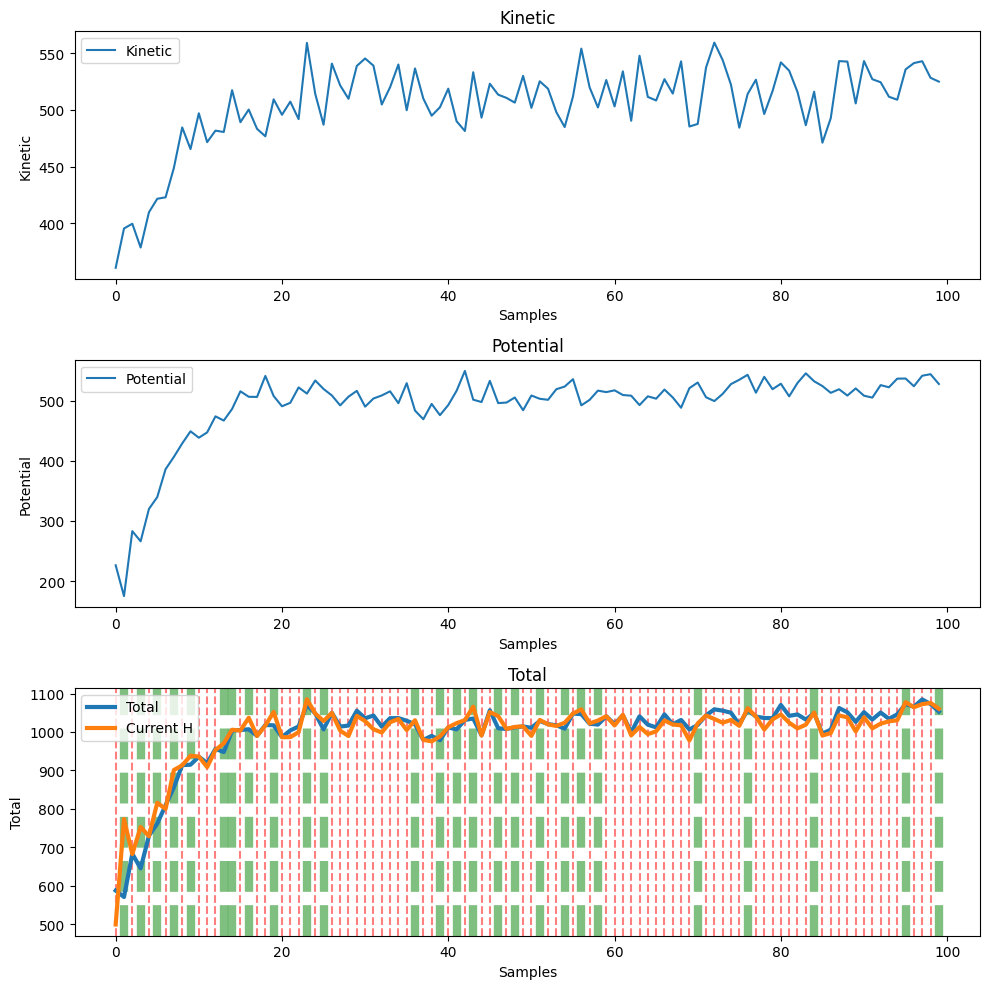

In [4]:
# plot momentum_keep and potential_keep in subplots and another subplot for summation of the two
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(momentum_keep, label='Kinetic')
plt.xlabel('Samples')
plt.ylabel('Kinetic')
plt.title('Kinetic')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(potential_keep, label='Potential')
plt.xlabel('Samples')
plt.ylabel('Potential')
plt.title('Potential')
plt.legend()

plt.subplot(3, 1, 3)
for i in range(num_samples):
    if acceptance_list[i] == 1:
        plt.axvline(x=i, color='g', linestyle='--', linewidth=6, alpha=0.5)
    else:
        plt.axvline(x=i, color='r', linestyle='--', alpha=0.5)
plt.plot(np.add(momentum_keep, potential_keep), label='Total', linewidth=3)
plt.plot(current_H, label='Current H', linewidth=3)
plt.xlabel('Samples')
plt.ylabel('Total')
plt.title('Total')
#plt.xlim(0, 45)
plt.legend()

plt.tight_layout()
plt.savefig('BPINN_leapfrog_' + str(num_leapfrog_steps) +'_energies.png')
plt.show()

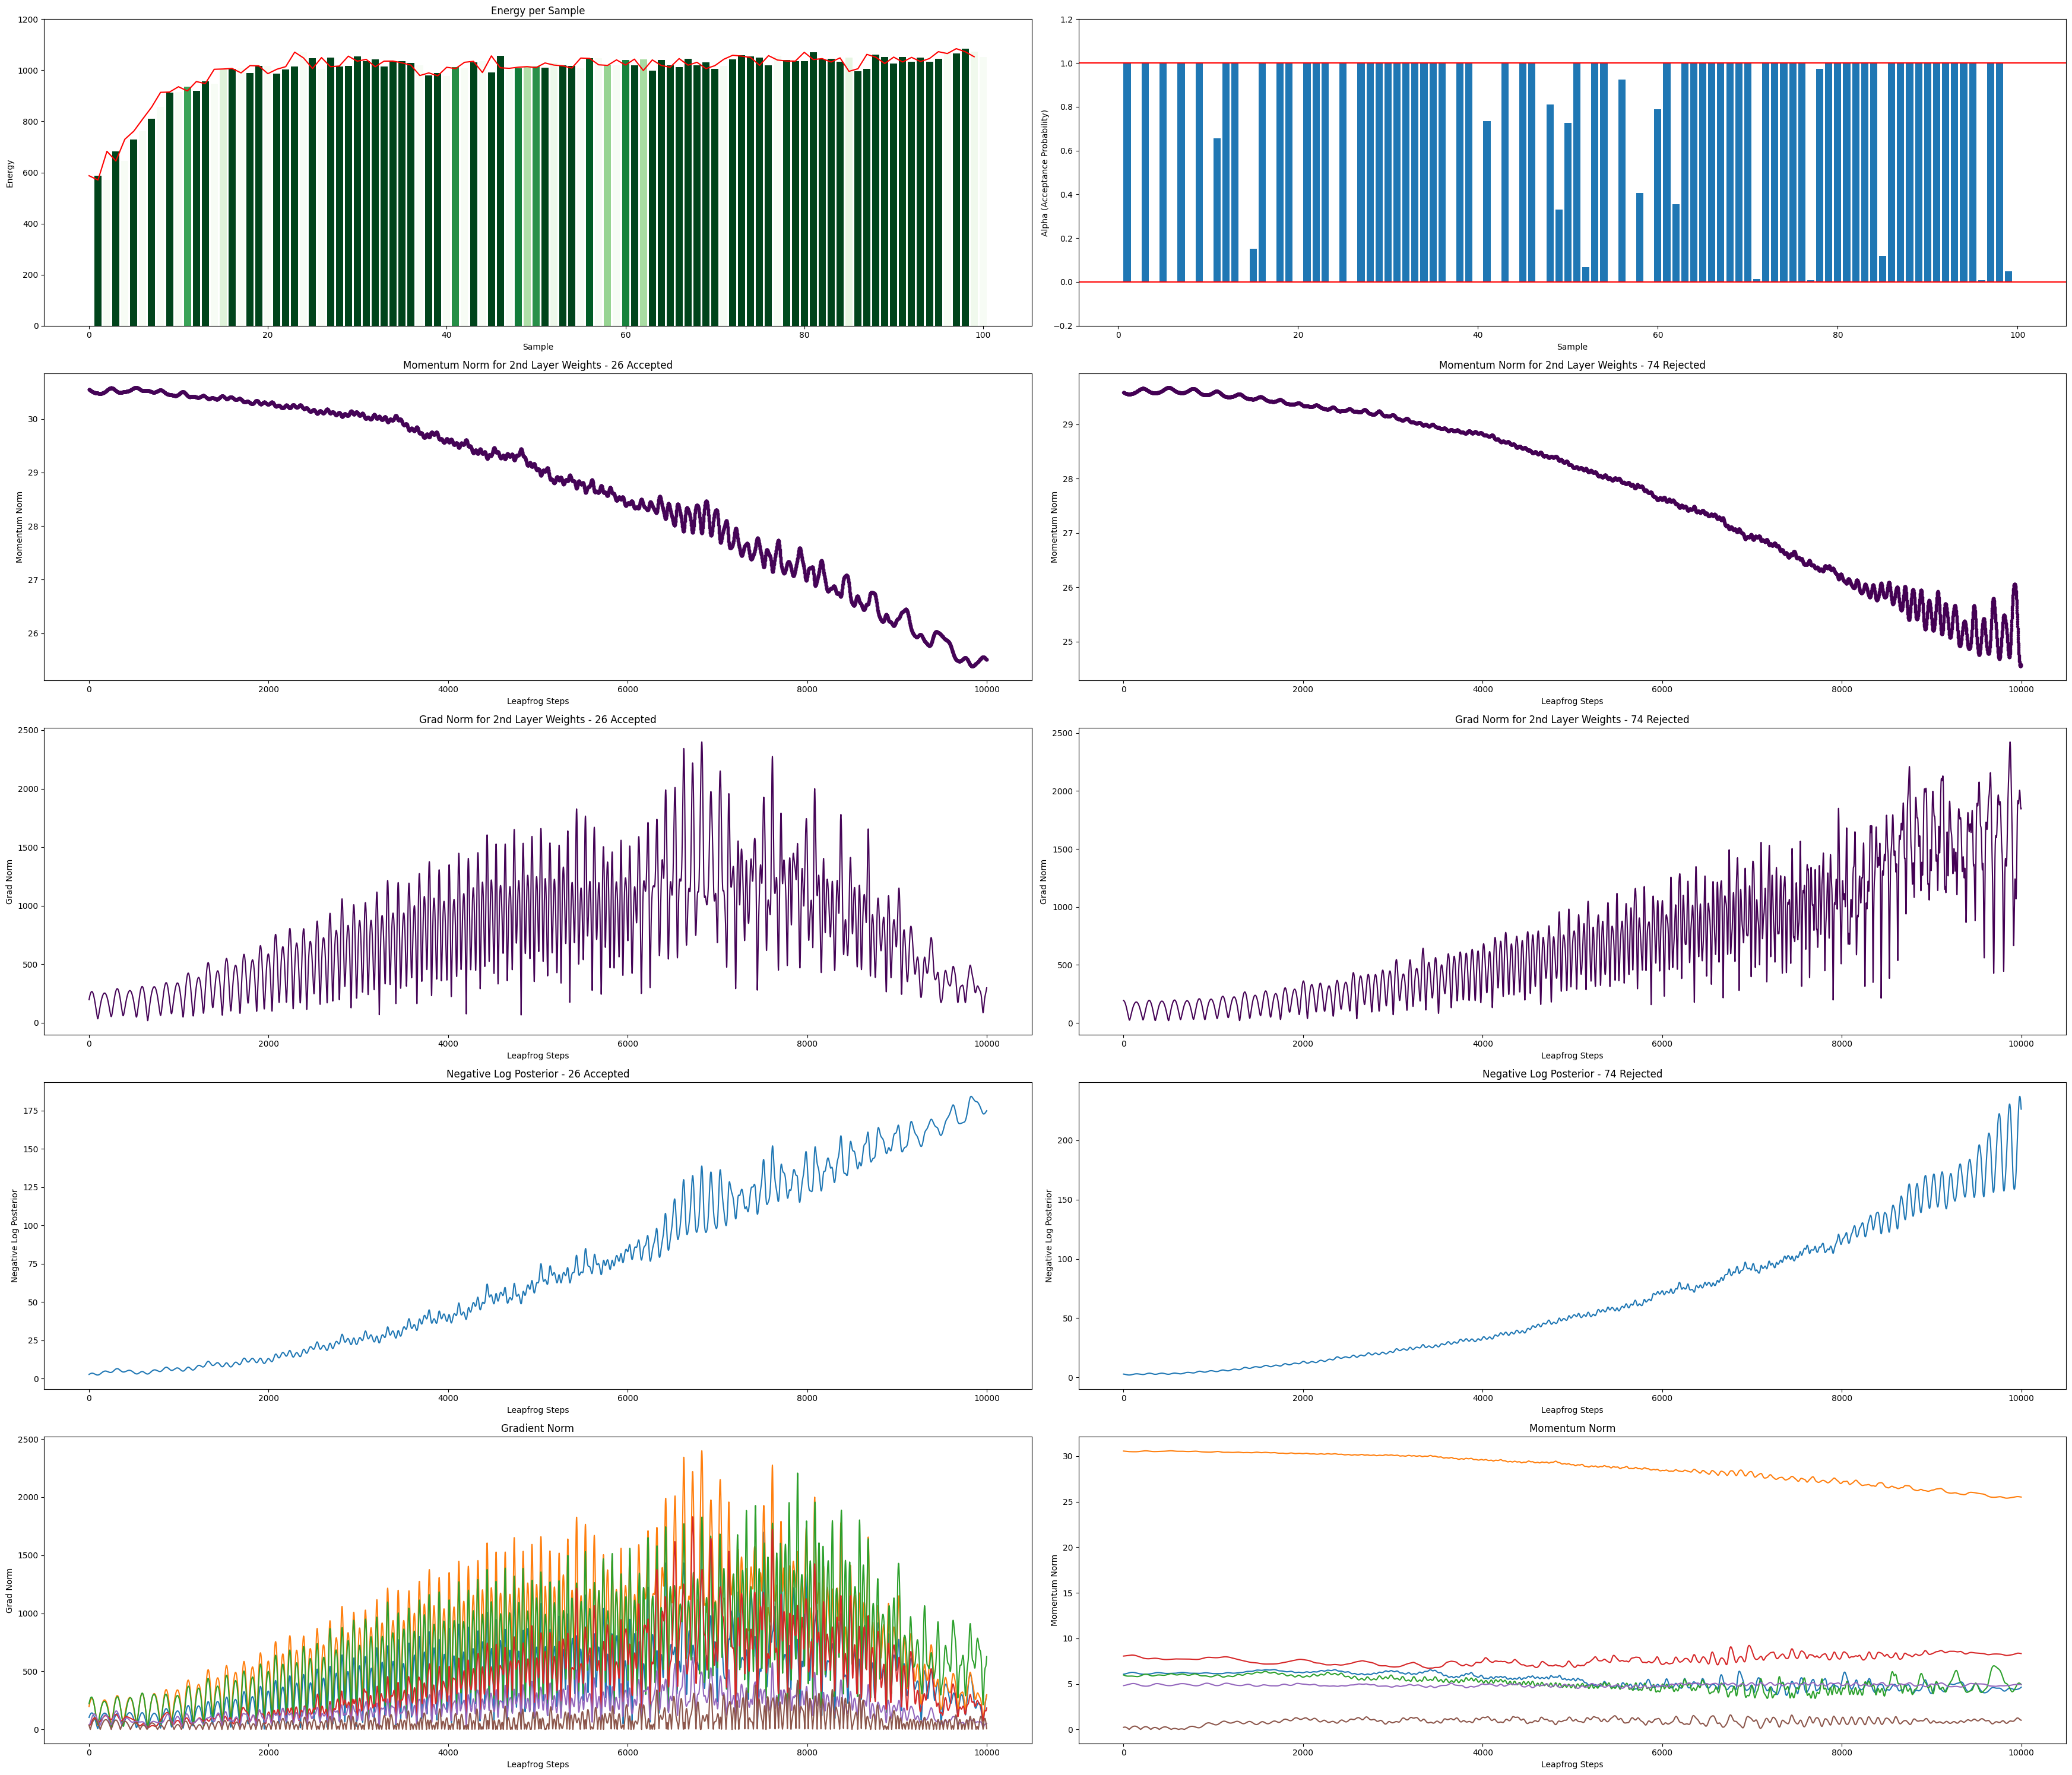

In [5]:
first_accepted = first_accepted
first_rejected = first_rejected

# Take first accepted and rejected samples only
momentum_accepted = momentum_norm_total[first_accepted]
momentum_rejected = momentum_norm_total[first_rejected]
grad_accepted = grad_list_total[first_accepted]
grad_rejected = grad_list_total[first_rejected]
negative_log_posterior_accepted = negative_log_posterior_list_total[first_accepted]
negative_log_posterior_rejected = negative_log_posterior_list_total[first_rejected]

remove = []
#remove = [6, 88, 89, 26] # For 1500 leapfrog steps
#remove = [6, 65, 2, 44, 68, 3] # For 3000 leapfrog steps
#remove = [70, 20, 54] # For 3750 leapfrog steps
#remove = [19, 0, 12] # For 4500 leapfrog steps
#remove = [37, 1, 27] # For 1300 Leapfrog steps
#remove = [97, 55] # For 700 Leapfrog steps
#remove = [23, 24] # For 400 Leapfrog steps

# Plot energy per sample
plt.figure(figsize=(35, 30))
plt.subplot(5, 2, 1)
# bar colours based on acceptance rate color map
plt.bar(range(1, num_samples+1), proposed_H_store, color=plt.cm.Greens(np.array(alphas)))
plt.plot(np.array(momentum_keep) + np.array(potential_keep), label='Total Energy', color='r')
plt.xlabel("Sample")
plt.ylabel("Energy")
plt.title("Energy per Sample")
plt.ylim(0, 1200)

plt.subplot(5, 2, 2)
# minus proposal_H_store - current_H for all
plt.bar(range(1, num_samples+1),alphas)
plt.ylim(-0.2,1.2)
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Sample')
plt.ylabel('Alpha (Acceptance Probability)')

# Create an array of 100 colours
import matplotlib.cm as cm
colors = [cm.viridis(x) for x in np.linspace(0, 1, num_samples)]
# create array of sample 1, sample 2, sample 3, etc. for legend
samples_array = [f'Sample {i+1}' for i in range(num_samples)]
plt.subplot(5, 2, 3)
for i in range(num_leapfrog_steps):
    plt.plot(i, momentum_accepted[i][1], '.', color=colors[first_accepted])       
plt.xlabel('Leapfrog Steps')
plt.ylabel('Momentum Norm')
#plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.title('Momentum Norm for 2nd Layer Weights - ' + str(num_accepted) + ' Accepted')

plt.subplot(5, 2, 4)
for i in range(num_leapfrog_steps):
    plt.plot(i, momentum_rejected[i][1], '.', color=colors[first_rejected])              
plt.xlabel('Leapfrog Steps')
plt.ylabel('Momentum Norm')
#plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.title('Momentum Norm for 2nd Layer Weights - ' + str(num_rejected) + ' Rejected')

# Plot Grad Norm for 2nd Layer Weights (only accepted samples)
plt.subplot(5, 2, 5)
for i in range(num_leapfrog_steps):
    x_values = list(range(num_leapfrog_steps))
    y_values = [grad_accepted[i][1] for i in range(num_leapfrog_steps)]
plt.plot(x_values, y_values, color=colors[first_accepted])
# Create the legend for accepted samples only
#plt.legend(handles, accepted_labels, loc='upper right', ncol=2, fontsize='small')
plt.xlabel('Leapfrog Steps')
plt.ylabel('Grad Norm')
plt.title('Grad Norm for 2nd Layer Weights - ' + str(num_accepted) + ' Accepted')

# Plot Grad Norm for 2nd Layer Weights (only accepted samples)
plt.subplot(5, 2, 6)
for i in range(num_leapfrog_steps):
    x_values = list(range(num_leapfrog_steps))
    y_values = [grad_rejected[i][1] for i in range(num_leapfrog_steps)]
plt.plot(x_values, y_values, color=colors[first_rejected])
#plt.legend(handles, accepted_labels, loc='upper right', ncol=2, fontsize='small')
plt.xlabel('Leapfrog Steps')
plt.ylabel('Grad Norm')
plt.title('Grad Norm for 2nd Layer Weights - ' + str(num_rejected) + ' Rejected')

plt.subplot(5, 2, 7)
plt.plot(negative_log_posterior_accepted)
plt.xlabel('Leapfrog Steps')
plt.ylabel('Negative Log Posterior')
plt.title('Negative Log Posterior - ' + str(num_accepted) + ' Accepted')
#plt.legend(loc='upper right', ncol=2, fontsize='small')

# Plot Negative Log Posterior for Rejected Samples
plt.subplot(5, 2, 8)
plt.plot(negative_log_posterior_rejected)
plt.xlabel('Leapfrog Steps')
plt.ylabel('Negative Log Posterior')
plt.title('Negative Log Posterior - ' + str(num_rejected) + ' Rejected')
#plt.legend(loc='upper right', ncol=2, fontsize='small')

plt.subplot(5, 2, 9)
plt.plot(grad_list_total[first_accepted])
plt.xlabel('Leapfrog Steps')
plt.ylabel('Grad Norm')
plt.title('Gradient Norm')

plt.subplot(5, 2, 10)
plt.plot(momentum_norm_total[first_accepted])
plt.xlabel('Leapfrog Steps')
plt.ylabel('Momentum Norm')
plt.title('Momentum Norm')

plt.tight_layout()
plt.savefig('../../Results/HMC/BPINN_leapfrog_' + str(num_leapfrog_steps) +'_1st-Sample.png')
plt.show()

In [ ]:
remove = []
#remove = [6, 88, 89, 26] # For 1500 leapfrog steps
#remove = [6, 65, 2, 44, 68, 3] # For 3000 leapfrog steps
#remove = [70, 20, 54] # For 3750 leapfrog steps
remove = [19, 0, 12] # For 4500 leapfrog steps
remove = [37, 1, 27] # For 1300 Leapfrog steps
remove = [97, 55] # For 700 Leapfrog steps
remove = [23, 24] # For 400 Leapfrog steps
remove = []

# Plot energy per sample
plt.figure(figsize=(35, 30))
plt.subplot(5, 2, 1)
# bar colours based on acceptance rate color map
plt.bar(range(1, num_samples+1), proposed_H_store, color=plt.cm.Greens(np.array(alphas)))
plt.plot(np.array(momentum_keep) + np.array(potential_keep), label='Total Energy', color='r')
plt.xlabel("Sample")
plt.ylabel("Energy")
plt.title("Energy per Sample")
plt.ylim(0, 1200)

plt.subplot(5, 2, 2)
# minus proposal_H_store - current_H for all
plt.bar(range(1, num_samples+1),alphas)
plt.ylim(-0.2,1.2)
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Sample')
plt.ylabel('Alpha (Acceptance Probability)')

# Create an array of 100 colours
import matplotlib.cm as cm
colors = [cm.viridis(x) for x in np.linspace(0, 1, num_samples)]
# create array of sample 1, sample 2, sample 3, etc. for legend
samples_array = [f'Sample {i+1}' for i in range(num_samples)]
plt.subplot(5, 2, 3)
for j in range(num_samples):
    if j not in remove:
        if acceptance_list[j] == 1:  # Only plot if sample was accepted
            for i in range(num_leapfrog_steps):
                if j != first_accepted:  # Only label the first point of each accepted sample
                    plt.plot(i, momentum_norm_total[j][i][1], 'o', color=colors[j])
                plt.plot(i, momentum_norm_total[first_accepted][i][1], 'o', color='red', markersize=15, label=samples_array[j])                    
plt.xlabel('Leapfrog Steps')
plt.ylabel('Momentum Norm')
#plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.title('Momentum Norm for 2nd Layer Weights - ' + str(num_accepted) + ' Accepted')

plt.subplot(5, 2, 4)
for j in range(num_samples):
    if j not in remove:
        if acceptance_list[j] == 0:  # Only plot if sample was accepted
            for i in range(num_leapfrog_steps):
                if j != first_rejected:  # Only label the first point of each accepted sample
                    plt.plot(i, momentum_norm_total[j][i][1], 'o', color=colors[j])
                plt.plot(i, momentum_norm_total[first_rejected][i][1], 'o', color='red', markersize=15, label=samples_array[j])                    
plt.xlabel('Leapfrog Steps')
plt.ylabel('Momentum Norm')
#plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.title('Momentum Norm for 2nd Layer Weights - ' + str(num_rejected) + ' Rejected')

# Plot Grad Norm for 2nd Layer Weights (only accepted samples)
plt.subplot(5, 2, 5)
handles = []
for j in range(num_samples):
    if j not in remove:
        if acceptance_list[j] == 1:  # Only plot if sample was accepted
            x_values = list(range(num_leapfrog_steps))
            y_values = [grad_list_total[j][i][1] for i in range(num_leapfrog_steps)]
            
            # Plot with lines
            if j != first_accepted:
                line, = plt.plot(x_values, y_values, '-', color=colors[j])
            else:
                line, = plt.plot(x_values, y_values, '-', color='red', linewidth=15, label=samples_array[j])
            handles.append(line)
# Create the legend for accepted samples only
accepted_labels = [samples_array[j] for j in range(num_samples) if acceptance_list[j] == 1]
#plt.legend(handles, accepted_labels, loc='upper right', ncol=2, fontsize='small')
plt.xlabel('Leapfrog Steps')
plt.ylabel('Grad Norm')
plt.title('Grad Norm for 2nd Layer Weights - ' + str(num_accepted) + ' Accepted')

# Plot Grad Norm for 2nd Layer Weights (only accepted samples)
plt.subplot(5, 2, 6)
handles = []
for j in range(num_samples):
    if j not in remove:
        if acceptance_list[j] == 0:  # Only plot if sample was accepted
            x_values = list(range(num_leapfrog_steps))
            y_values = [grad_list_total[j][i][1] for i in range(num_leapfrog_steps)]
            
            # Plot with lines
            if j != first_rejected:
                line, = plt.plot(x_values, y_values, '-', color=colors[j])
            else:
                line, = plt.plot(x_values, y_values, '-', color='red', linewidth=15,label=samples_array[j])
            handles.append(line)
accepted_labels = [samples_array[j] for j in range(num_samples) if acceptance_list[j] == 0]
#plt.legend(handles, accepted_labels, loc='upper right', ncol=2, fontsize='small')
plt.xlabel('Leapfrog Steps')
plt.ylabel('Grad Norm')
plt.title('Grad Norm for 2nd Layer Weights - ' + str(num_rejected) + ' Rejected')

plt.subplot(5, 2, 7)
for j in range(num_samples):
    if j not in remove:
        if acceptance_list[j] == 1:  # Accepted samples
            if j != first_accepted:
                plt.plot(negative_log_posterior_list_total[j], color=colors[j], label=f'Sample {j+1}')
            else:
                plt.plot(negative_log_posterior_list_total[j], color='red', linewidth=15, label=f'Sample {j+1}')
plt.xlabel('Leapfrog Steps')
plt.ylabel('Negative Log Posterior')
plt.title('Negative Log Posterior - ' + str(num_accepted) + ' Accepted')
#plt.legend(loc='upper right', ncol=2, fontsize='small')

# Plot Negative Log Posterior for Rejected Samples
plt.subplot(5, 2, 8)
for j in range(num_samples):
    if j not in remove:
        if acceptance_list[j] == 0:  # Rejected samples
            if j != first_rejected:
                plt.plot(negative_log_posterior_list_total[j], color=colors[j], label=f'Sample {j+1}', alpha=0.5)
            else:
                plt.plot(negative_log_posterior_list_total[j], color='red', linewidth=15, label=f'Sample {j+1}')
plt.xlabel('Leapfrog Steps')
plt.ylabel('Negative Log Posterior')
plt.title('Negative Log Posterior - ' + str(num_rejected) + ' Rejected')
#plt.legend(loc='upper right', ncol=2, fontsize='small')

plt.subplot(5, 2, 9)
plt.plot(grad_list_total[first_accepted])
plt.xlabel('Leapfrog Steps')
plt.ylabel('Grad Norm')
plt.title('Gradient Norm')

plt.subplot(5, 2, 10)
plt.plot(momentum_norm_total[first_accepted])
plt.xlabel('Leapfrog Steps')
plt.ylabel('Momentum Norm')
plt.title('Momentum Norm')

plt.tight_layout()
plt.savefig('../../Results/HMC/BPINN_leapfrog_' + str(num_leapfrog_steps) +'_cleaned.png')
plt.show()